In [1]:
#core libraries 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import requests


In [2]:
#web scrape the current covid 19  cases
r = requests.get('https://covid19.ncdc.gov.ng')
d = pd.read_html(r.text , header = 0)


In [3]:

#loop to get the dataframe  
for y in d:
    p = pd.DataFrame(y)
    print(p)
    


   States Affected  No. of Cases (Lab Confirmed)  No. of Cases (on admission)  \
0            Lagos                         17992                         2581   
1              FCT                          5028                         3534   
2              Oyo                          3050                         1331   
3              Edo                          2545                          201   
4          Plateau                          2135                          957   
5           Rivers                          2063                          109   
6           Kaduna                          2041                          203   
7             Kano                          1711                          194   
8            Delta                          1708                          144   
9             Ogun                          1625                          156   
10            Ondo                          1515                          707   
11           Enugu          

In [4]:
p

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,17992,2581,15209,202
1,FCT,5028,3534,1448,46
2,Oyo,3050,1331,1682,37
3,Edo,2545,201,2244,100
4,Plateau,2135,957,1149,29
5,Rivers,2063,109,1897,57
6,Kaduna,2041,203,1826,12
7,Kano,1711,194,1463,54
8,Delta,1708,144,1518,46
9,Ogun,1625,156,1443,26


In [5]:
p.dtypes

States Affected                 object
No. of Cases (Lab Confirmed)     int64
No. of Cases (on admission)      int64
No. Discharged                   int64
No. of Deaths                    int64
dtype: object

In [6]:
p.describe(include = "all")

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
count,37,37.000000,37.000000,37.00000,37.000000
unique,37,NaN,NaN,NaN,NaN
top,Niger,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,1420.216216,332.081081,1061.00000,27.135135
std,NaN,2987.260378,723.572095,2470.68795,35.276024
min,NaN,5.000000,0.000000,3.00000,2.000000
25%,NaN,225.000000,24.000000,159.00000,9.000000
50%,NaN,714.000000,100.000000,545.00000,16.000000
75%,NaN,1625.000000,201.000000,1149.00000,29.000000


In [7]:
p.isnull().sum()

States Affected                 0
No. of Cases (Lab Confirmed)    0
No. of Cases (on admission)     0
No. Discharged                  0
No. of Deaths                   0
dtype: int64

In [9]:
states_group = p.groupby(['States Affected'])
print(states_group)

In [10]:
states_group.get_group('Kano')

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
7,Kano,1711,194,1463,54


<AxesSubplot:xlabel='States Affected', ylabel='No. of Cases (on admission)'>

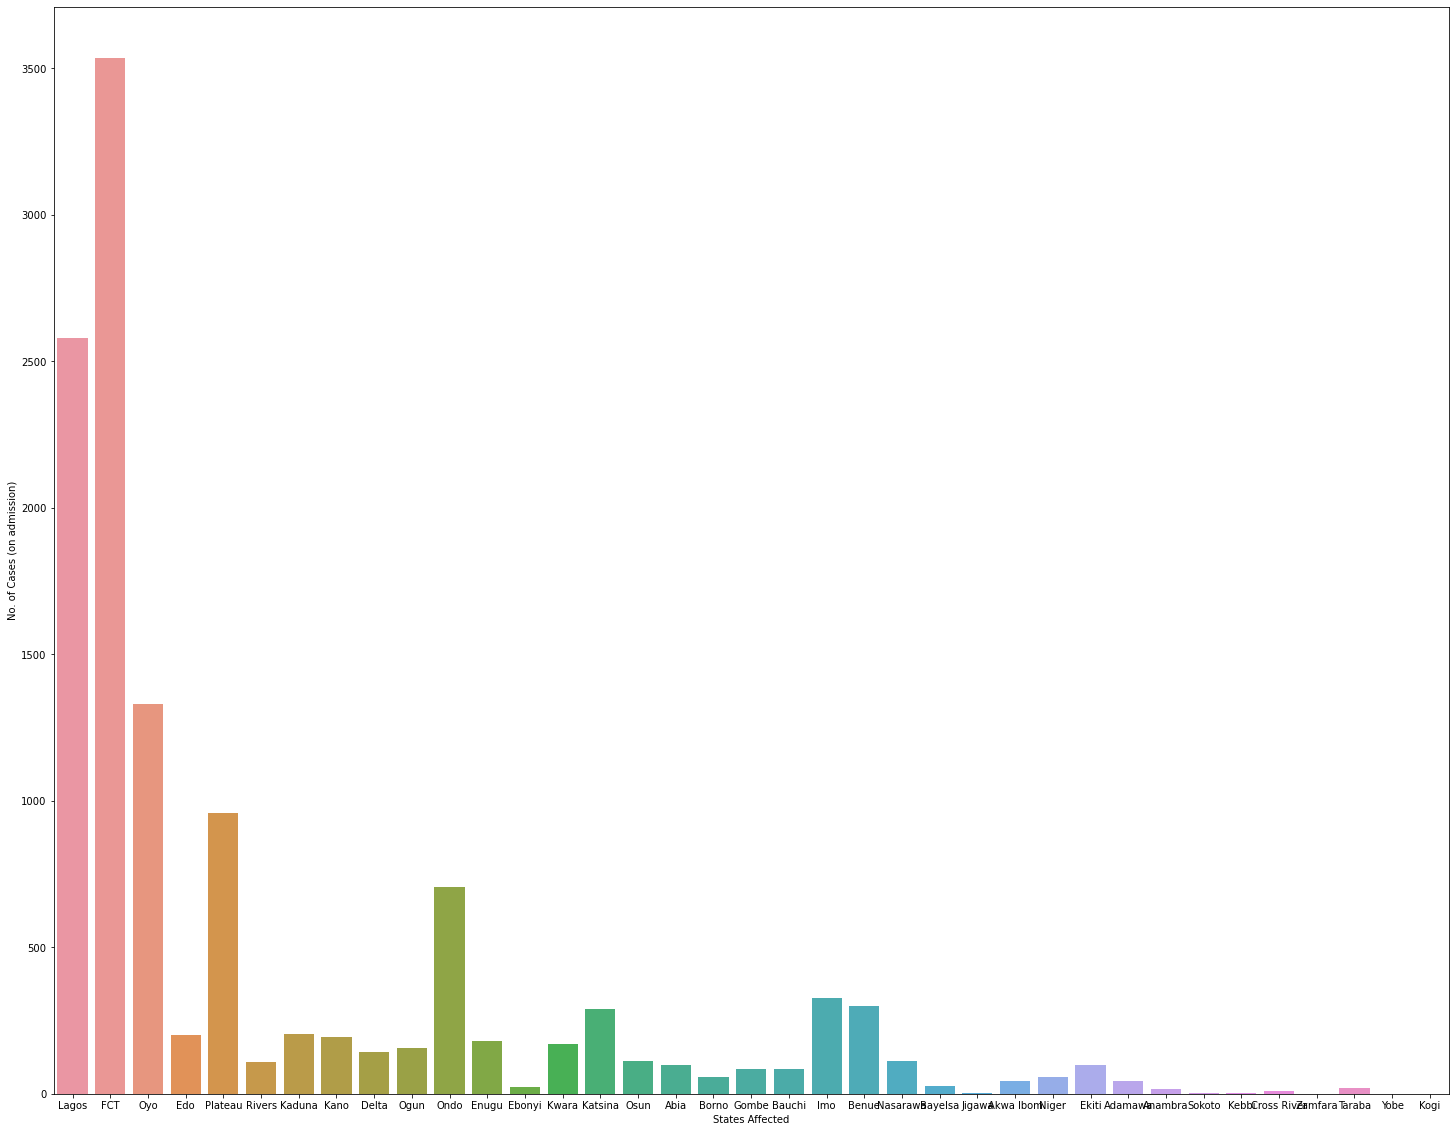

In [11]:
#intialize the seaborn
plt.figure(figsize = (25,20))
sns.barplot(p["States Affected"] , p["No. of Cases (on admission)"] , data = p  )